In [210]:
import pandas as pd
from PIL import Image
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math

In [211]:
images = context.catalog.load("express_expense")

[05/18/23 11:51:11] INFO     Loading data from 'express_expense' (PartitionedDataSet)...        ]8;id=564228;file:///home/zig/.pyenv/versions/3.10.8/envs/sibigrapi23/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=967311;file:///home/zig/.pyenv/versions/3.10.8/envs/sibigrapi23/lib/python3.10/site-packages/kedro/io/data_catalog.py#343\343]8;;\

In [271]:
img = images["1002-receipt.jpg"]()

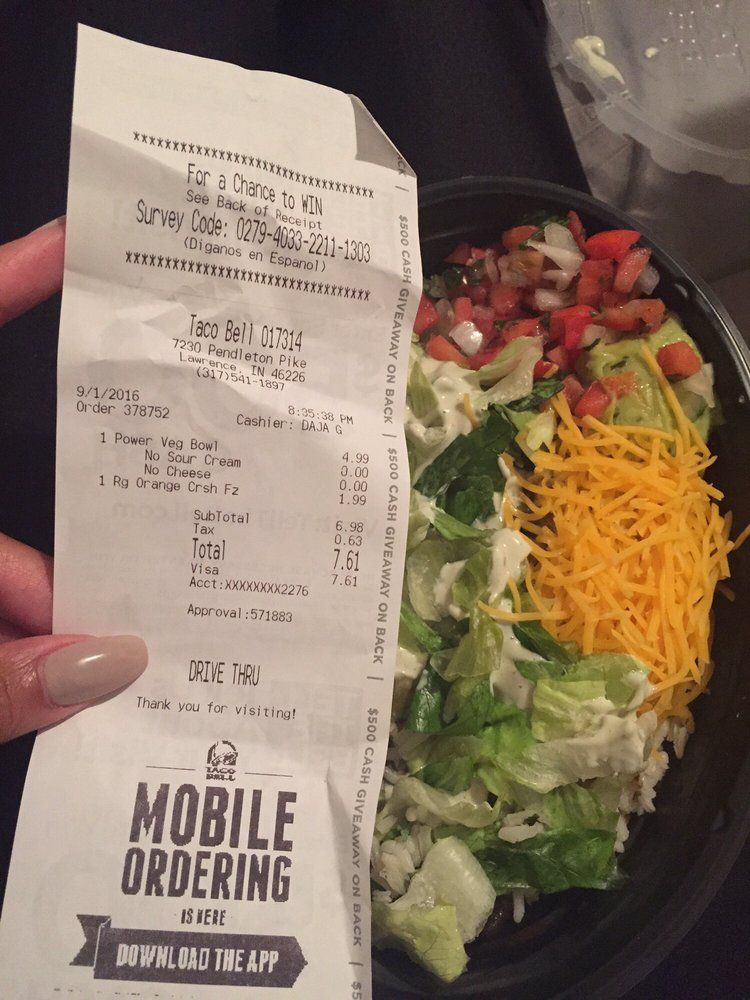

In [272]:
img

In [273]:
img = np.array(img)

In [274]:
kernel = np.ones((3,3),np.uint8)
im = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel, iterations=5)

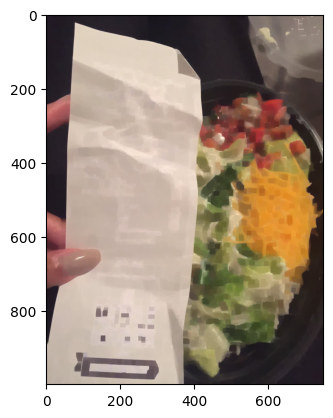

In [275]:
plt.imshow(im)

In [276]:
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (20,20,im.shape[1]-20,im.shape[0]-20)
cv2.grabCut(im,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
im = im*mask2[:,:,np.newaxis]

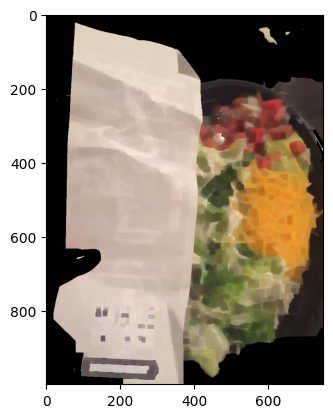

In [277]:
plt.imshow(im)

In [278]:
gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
# Edge Detection.
canny = cv2.Canny(gray, 0, 200)
canny = cv2.dilate(canny, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)))

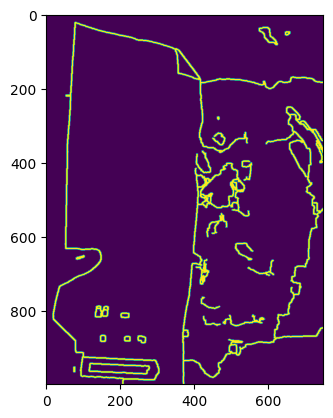

In [279]:
plt.imshow(canny)

In [280]:
# Blank canvas.
con = np.zeros_like(im)
# Finding contours for the detected edges.
contours, hierarchy = cv2.findContours(canny, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
# Keeping only the largest detected contour.
page = sorted(contours, key=cv2.contourArea, reverse=True)[:5]
con = cv2.drawContours(con, page, -1, (0, 255, 255), 3)

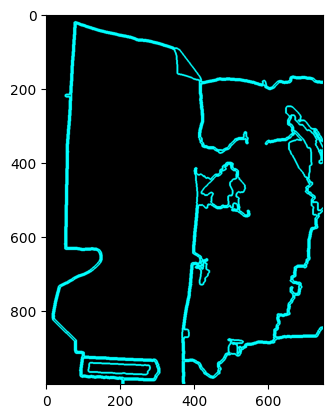

In [281]:
plt.imshow(con)

In [282]:
# Blank canvas.
con = np.zeros_like(img)
# Finding contours for the detected edges.
contours, hierarchy = cv2.findContours(canny, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
# Keeping only the largest detected contour.
page = sorted(contours, key=cv2.contourArea, reverse=True)[:5]
con = cv2.drawContours(con, page, -1, (0, 255, 255), 3)

In [270]:
# Blank canvas.
con = np.zeros_like(img)
# Loop over the contours.
for c in page:
  # Approximate the contour.
  epsilon = 0.02 * cv2.arcLength(c, True)
  corners = cv2.approxPolyDP(c, epsilon, True)
  # If our approximated contour has four points
  if len(corners) == 4:
      break
cv2.drawContours(con, c, -1, (0, 255, 255), 3)
cv2.drawContours(con, corners, -1, (0, 255, 0), 10)
# Sorting the corners and converting them to desired shape.
corners = sorted(np.concatenate(corners).tolist())
 
# Displaying the corners.
for index, c in enumerate(corners):
  character = chr(65 + index)
  cv2.putText(con, character, tuple(c), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 1, cv2.LINE_AA)